In [2]:
#importing data
import pandas as pd

df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Machine learning\Logistic regression\alzheimers_disease_data.csv')
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape[1]

35

In [3]:
# checking nulls
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

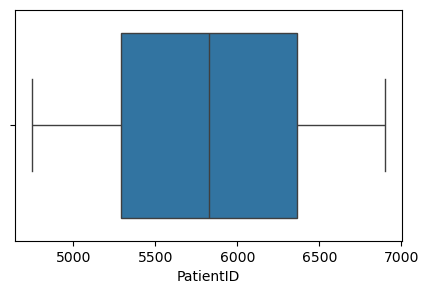

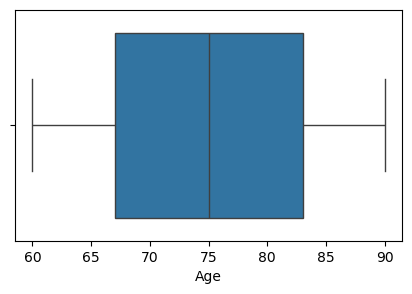

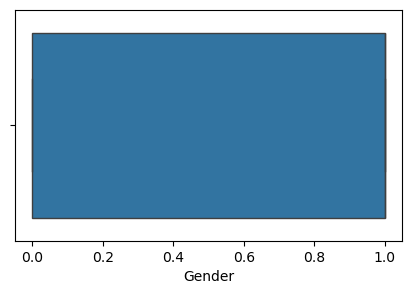

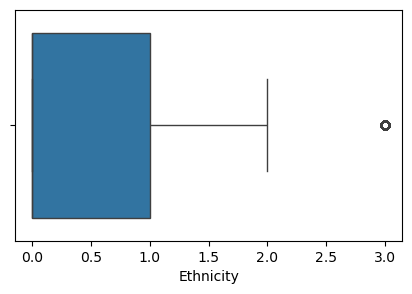

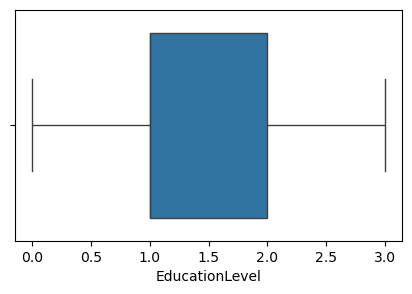

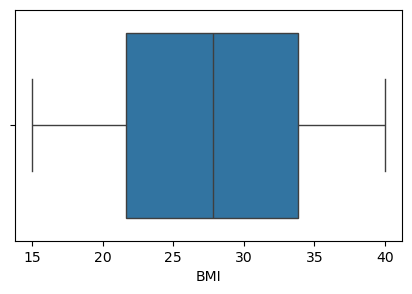

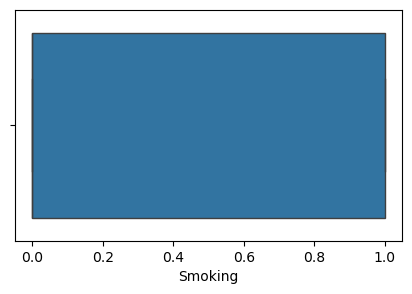

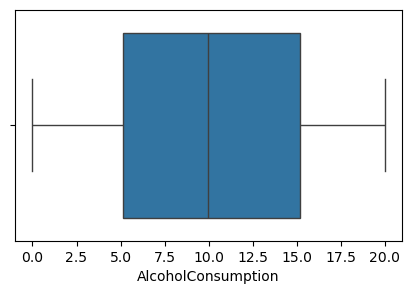

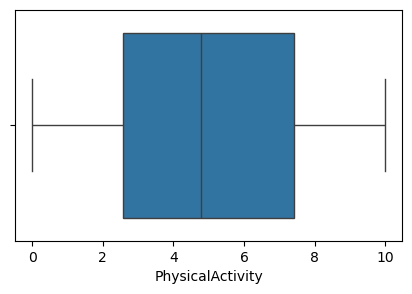

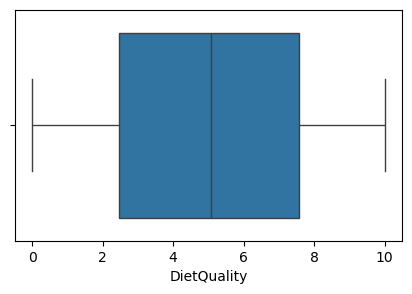

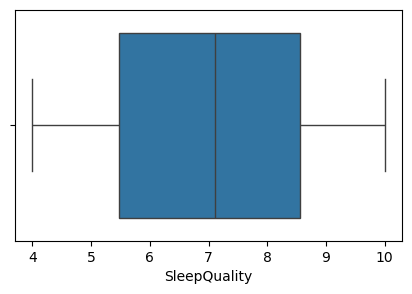

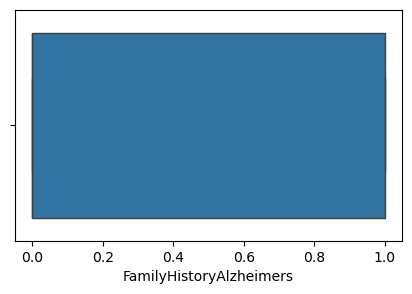

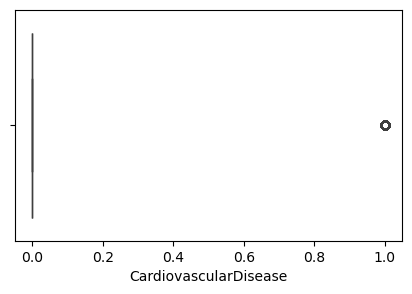

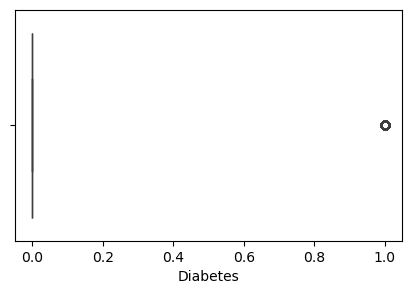

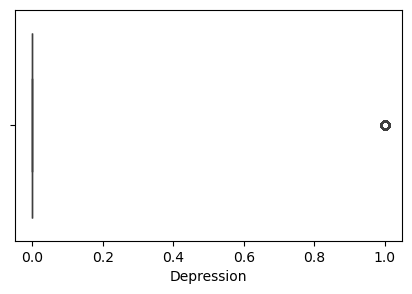

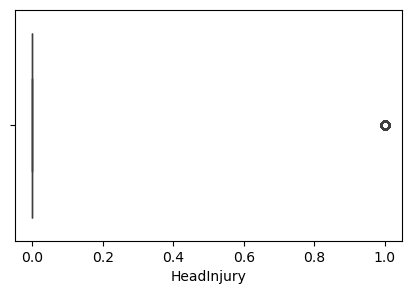

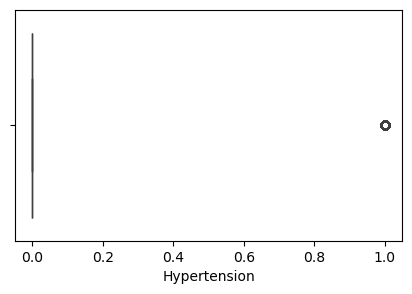

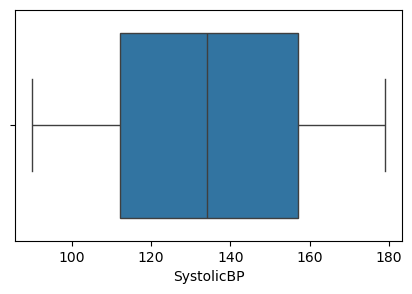

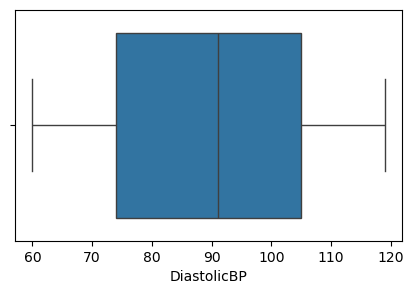

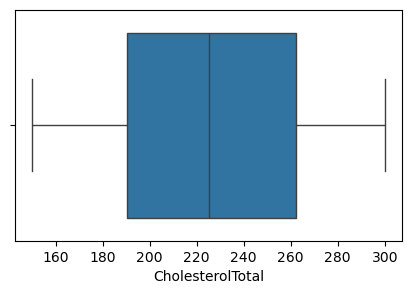

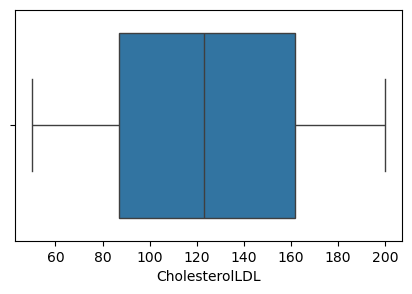

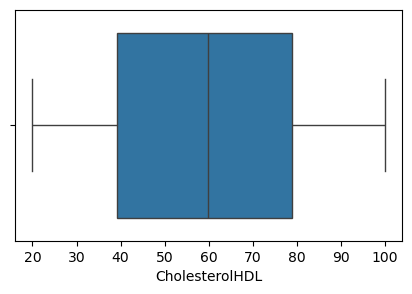

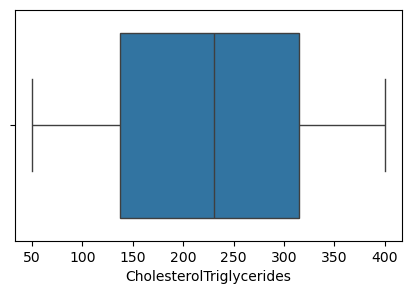

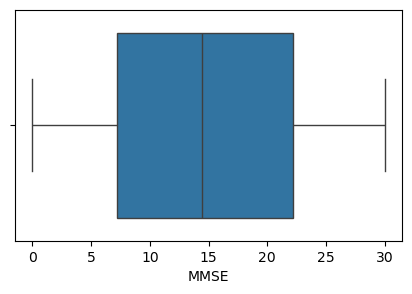

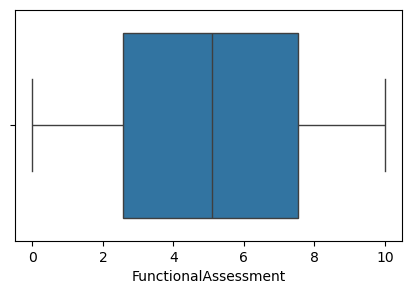

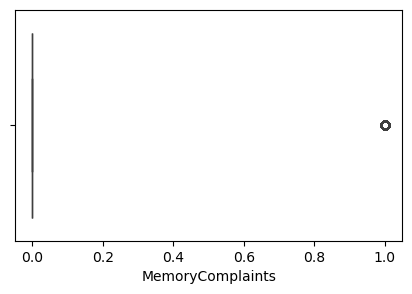

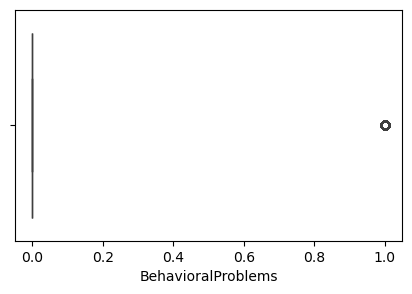

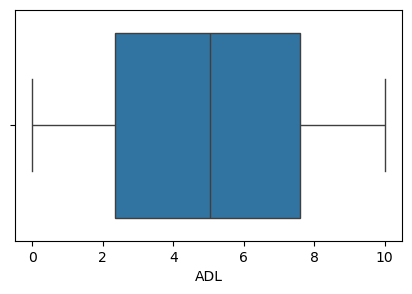

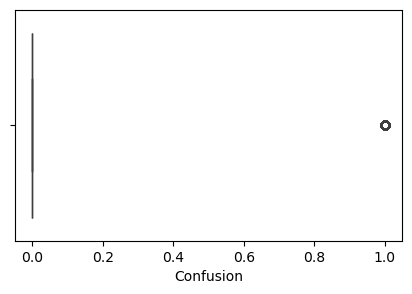

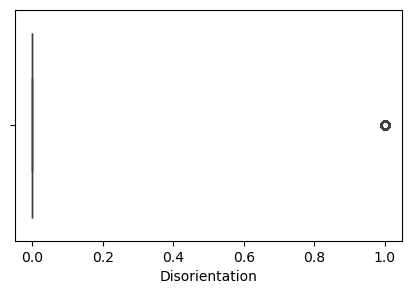

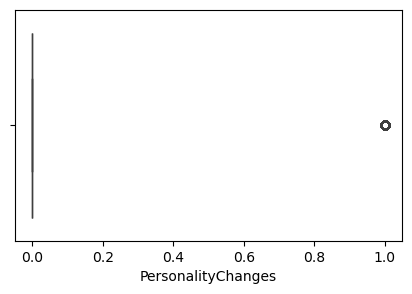

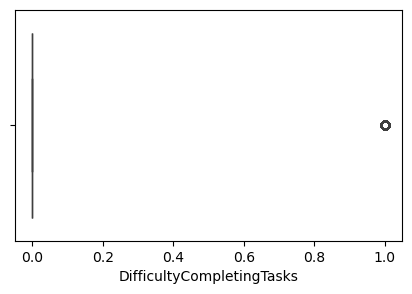

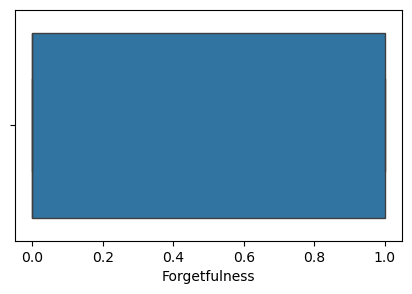

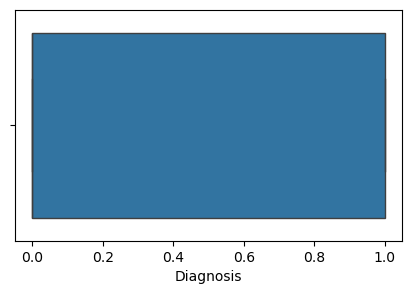

In [6]:
# detecting outliers
import matplotlib.pyplot as plt
import seaborn as sns
for i in numeric_df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=numeric_df[i])
    plt.show()

In [8]:
numeric_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [9]:
from sklearn.model_selection import train_test_split
# sepearting dependant and independant variables
x = numeric_df.drop('Diagnosis', axis=1)
y = numeric_df['Diagnosis']

# I will split the data into 70% training 30 % testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#stratify=y ensures that the train and test sets have the same class proportions (like 0s and 1s) as the original dataset.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1504, 33)
(645, 33)
(1504,)
(645,)


In [10]:
# scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_stand = sc.fit_transform(x_train)
x_test_stand  = sc.transform(x_test)

In [11]:
#balancing the data split using SMOTE. It will create more rows for the categories which has less data, to balance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train_stand, y_train)

In [12]:
# training the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=21, weights='uniform', p=1)  #manhattan is p =1
knn.fit(x_train_bal, y_train_bal)

KNeighborsClassifier(n_neighbors=21, p=1)

In [14]:
# lets check can it predit well or not

y_predict = knn.predict(x_test_stand)

In [15]:
#checking scores
print(knn.score(x_train_bal,y_train_bal))
print(knn.score(x_test_stand,y_test))

0.8441295546558705
0.7317829457364341


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_predict)
confusion_matrix = confusion_matrix(y_test, y_predict)
classification_report = classification_report(y_test, y_predict)

print(f'accuracy_score is {accuracy_score}')
print(f'confusion_matrix is {confusion_matrix}')
print(f'classification_report is {classification_report}')

accuracy_score is 0.7317829457364341
confusion_matrix is [[288 113]
 [ 60 184]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.72      0.77       401
           1       0.62      0.75      0.68       244

    accuracy                           0.73       645
   macro avg       0.72      0.74      0.72       645
weighted avg       0.75      0.73      0.74       645

